In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and Explore the Data

In [240]:
file_path = "C:\Programming\hands-on-projects\day2-beijing+pm2+5+data\PRSA_data_2010.1.1-2014.12.31.csv"

df = pd.read_csv(file_path)

In [241]:
print(df.dtypes)
df.tail()

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [242]:
df['day'] = df['day'].astype(str)
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df.dtypes
print(len(df))

43824


In [243]:
df['Date'] = df['year'] + '/' + df['month'] + '/' + df['day']
df['Date'] = pd.to_datetime(df['Date'])
df = df.fillna(method='bfill')
# df = df.interpolate(method='bfill', order=5, limit_direction ='backward', limit_area='outside')
print(len(df))
df = df.groupby('Date').mean()
df['Date'] = df.index
df.reset_index(inplace = True, drop = True)

df.head()

43824


C:\Users\sinah\AppData\Local\Temp\ipykernel_38344\3553874589.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Date').mean()


,No,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,Date
0,12.5,11.5,129.000000,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0,2010-01-01
1,36.5,11.5,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,2010-01-02
2,60.5,11.5,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,2010-01-03
3,84.5,11.5,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,2010-01-04
4,108.5,11.5,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,2010-01-05


2.9583333333333335
542.75
2010-01-01 00:00:00
2014-12-31 00:00:00


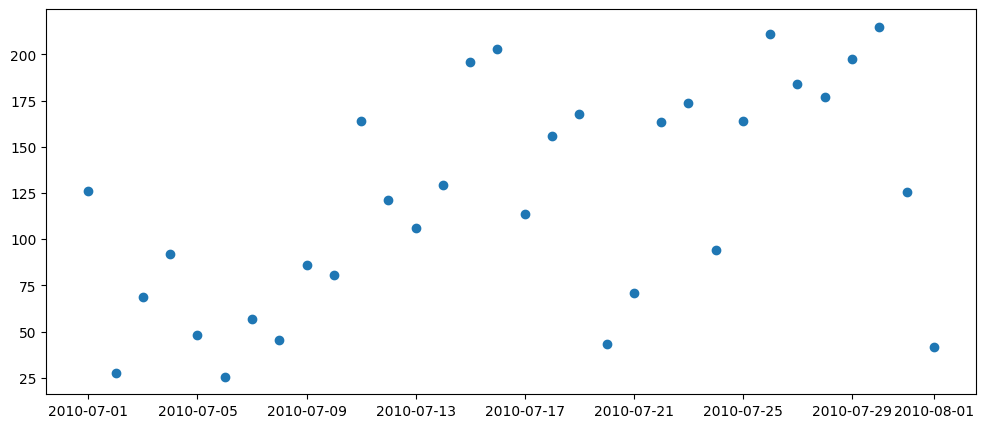

In [ ]:
print(df['pm2.5'].min())
print(df['pm2.5'].max())
print(df['Date'].min())
print(df['Date'].max())

range = (df['Date'] >= '2010-07-01') & (df['Date'] <= '2010-08-01')
df.drop('hour', axis=1, inplace= True)

plt.figure(figsize=(12, 5))
plt.scatter(df.loc[range]['Date'], df.loc[range]['pm2.5'], label='Actual')

In [245]:
df.head()

,No,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,Date
0,12.5,129.000000,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0,2010-01-01
1,36.5,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,2010-01-02
2,60.5,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,2010-01-03
3,84.5,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,2010-01-04
4,108.5,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,2010-01-05
